# Computer Vision Project - Soybean Leaves Disease Detection
## Data Preprocessing Portion
### Warning - may take at least 15-20 minutes to run this entire notebook

Sick area fraction: 0.5783186933074808; STD-DEV masked hue: 0.04716245289356724



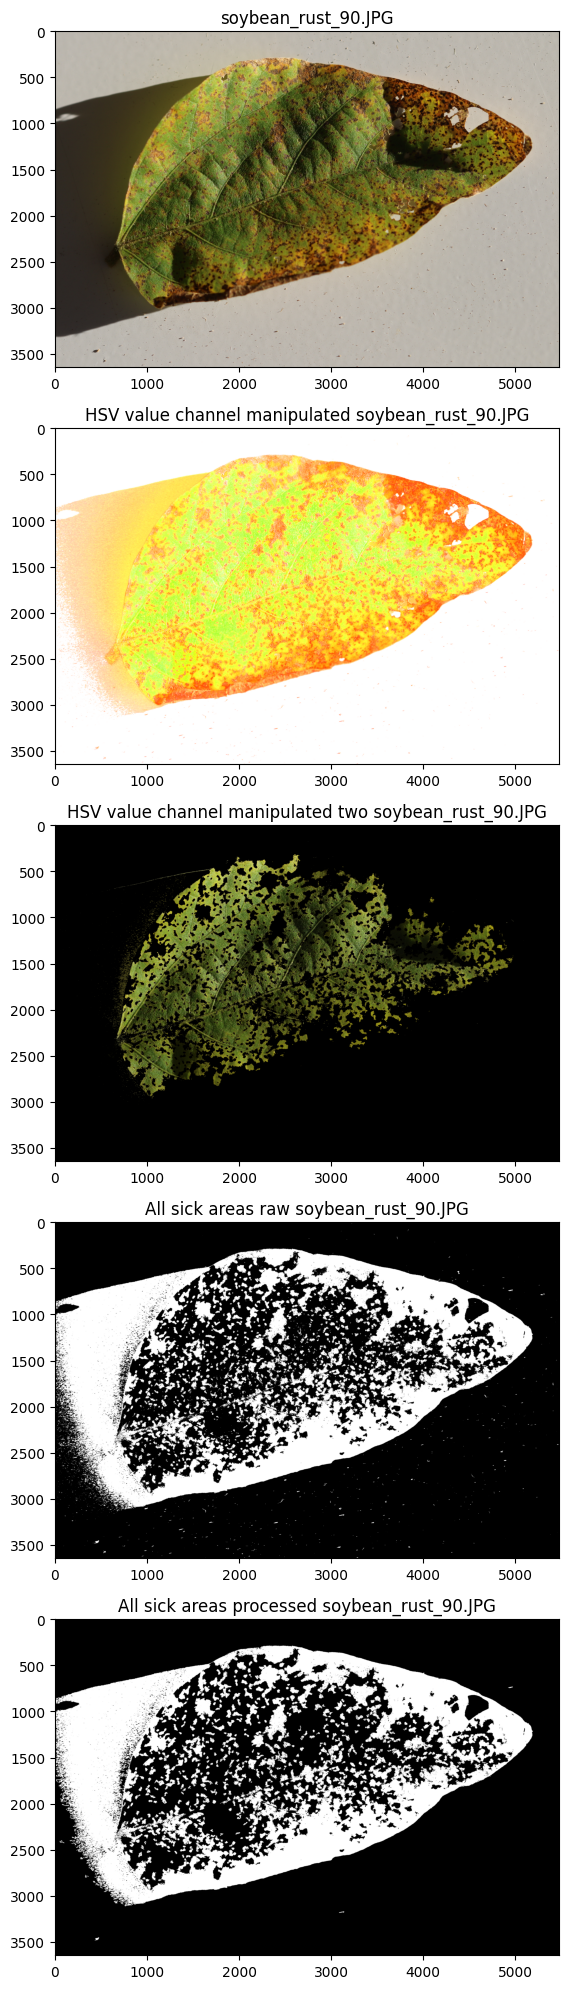

In [1]:
from skimage import io
from skimage.color import rgb2hsv, hsv2rgb
from skimage.morphology import remove_small_objects
import matplotlib.pyplot as plt
import numpy as np

good_bkgd_sb_rust_dir_str = "./imgs_with_good_background/soybean_rust/"
test_sb_rust_photo_str = "soybean_rust_90.JPG"
HSV_V_CHANNEL_INIT_MASK_VAL = 1.0
HSV_V_CHANNEL_NON_HEALTHY_MASK_VAL = 0.0
MAX_S_CHANNEL_VAL_BKGD = 0.25
HSV_S_CHANNEL_MASK_VAL = 0.0
HEALTHY_HUE_UPPER = 0.50 # tunable upper threshold
HEALTHY_HUE_LOWER = 0.15 # tunable lower threshold
NOISE_PATCH_MAX_SIZE = 400

test_sb_rust_img = io.imread(good_bkgd_sb_rust_dir_str + test_sb_rust_photo_str)
test_sb_rust_img_hsv = rgb2hsv(test_sb_rust_img)
test_sb_rust_img_s_only = test_sb_rust_img_hsv[:, :, 1].copy()
test_sb_rust_img_h_only = test_sb_rust_img_hsv[:, :, 0].copy()
test_sb_rust_img_v_only = test_sb_rust_img_hsv[:, :, 2].copy()
test_sb_rust_img_hsv_cp1 = test_sb_rust_img_hsv.copy()
test_sb_rust_img_hsv[:, :, 2] = HSV_V_CHANNEL_INIT_MASK_VAL
background_s_mask = test_sb_rust_img_s_only <= MAX_S_CHANNEL_VAL_BKGD
healthy_h_mask = (HEALTHY_HUE_LOWER <= test_sb_rust_img_h_only) & (test_sb_rust_img_h_only <= HEALTHY_HUE_UPPER)
test_sb_rust_img_s_only[background_s_mask] = HSV_S_CHANNEL_MASK_VAL
test_sb_rust_img_v_only[~healthy_h_mask | background_s_mask] = HSV_V_CHANNEL_NON_HEALTHY_MASK_VAL
sick_mask = ~healthy_h_mask & ~background_s_mask
procd_sick_mask = remove_small_objects(sick_mask, min_size=NOISE_PATCH_MAX_SIZE, connectivity=2)
std_hue_test_sb_rust = test_sb_rust_img_h_only[~background_s_mask].std(ddof=1)
test_sb_rust_img_hsv[:, :, 1] = test_sb_rust_img_s_only
test_sb_rust_img_hsv_cp1[:, :, 2] = test_sb_rust_img_v_only
test_sb_rust_img_hsv_val_zeroed_rgb = hsv2rgb(test_sb_rust_img_hsv)
test_sb_rust_img_hsv_val_procd_rgb = hsv2rgb(test_sb_rust_img_hsv_cp1)
healthy_h_mask_no_bkgd = healthy_h_mask & ~background_s_mask
sick_area_frac = float(procd_sick_mask.astype(np.int64).sum()) / \
                    (float(procd_sick_mask.astype(np.int64).sum()) + float(healthy_h_mask_no_bkgd.astype(np.int64).sum()))

print(f"Sick area fraction: {sick_area_frac}; STD-DEV masked hue: {std_hue_test_sb_rust}\n")
fig1, ax1 = plt.subplots(nrows=5, ncols=1, figsize=(6, 4*5))
ax1[0].imshow(test_sb_rust_img)
ax1[0].axis("image")
ax1[0].set_title(test_sb_rust_photo_str)
ax1[1].imshow(test_sb_rust_img_hsv_val_zeroed_rgb)
ax1[1].axis("image")
ax1[1].set_title("HSV value channel manipulated " + test_sb_rust_photo_str)
ax1[2].imshow(test_sb_rust_img_hsv_val_procd_rgb)
ax1[2].axis("image")
ax1[2].set_title("HSV value channel manipulated two " + test_sb_rust_photo_str)
ax1[3].imshow(sick_mask.astype(np.uint8) * 255, cmap="gray")
ax1[3].axis("image")
ax1[3].set_title("All sick areas raw " + test_sb_rust_photo_str)
ax1[4].imshow(procd_sick_mask.astype(np.uint8) * 255, cmap="gray")
ax1[4].axis("image")
ax1[4].set_title("All sick areas processed " + test_sb_rust_photo_str)
fig1.tight_layout()
plt.show();

Sick area fraction: 0.9757955856667252; STD-DEV masked hue: 0.026070707862030414



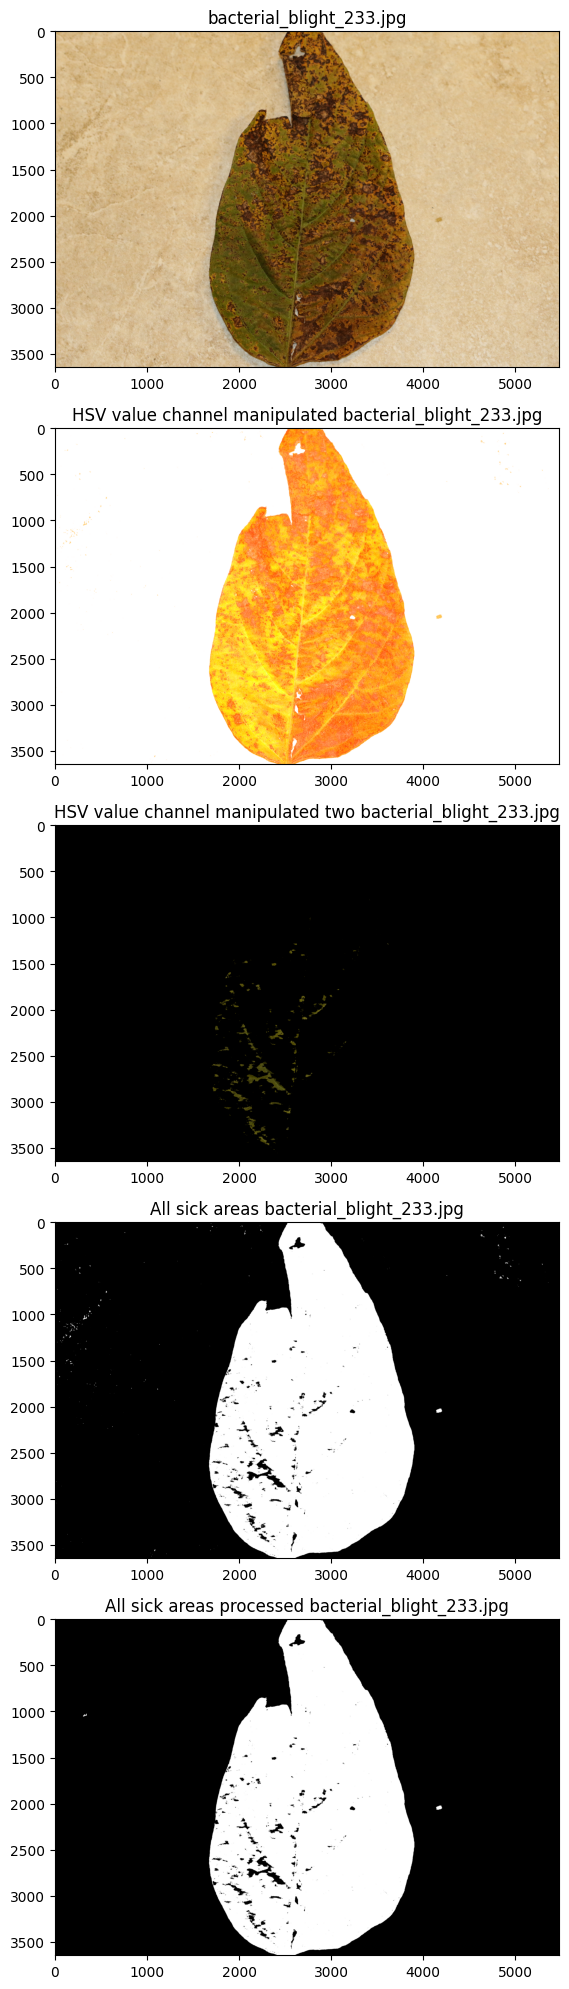

In [2]:
good_bkgd1_bac_blight_dir_str = "./imgs_with_good_background/bacterial_blight/bkgd1/"
test_bac_blight_str = "bacterial_blight_233.jpg"
MAX_S_CHANNEL_VAL_BKGD1 = 0.50

test_bac_blight_img = io.imread(good_bkgd1_bac_blight_dir_str + test_bac_blight_str)
test_bac_blight_img_hsv = rgb2hsv(test_bac_blight_img)
test_bac_blight_img_s_only = test_bac_blight_img_hsv[:, :, 1].copy()
test_bac_blight_img_h_only = test_bac_blight_img_hsv[:, :, 0].copy()
test_bac_blight_img_v_only = test_bac_blight_img_hsv[:, :, 2].copy()
test_bac_blight_img_hsv_cp1 = test_bac_blight_img_hsv.copy()
test_bac_blight_img_hsv[:, :, 2] = HSV_V_CHANNEL_INIT_MASK_VAL
healthy_h_mask2 = (HEALTHY_HUE_LOWER <= test_bac_blight_img_h_only) & (test_bac_blight_img_h_only <= HEALTHY_HUE_UPPER)
background_s_mask2 = test_bac_blight_img_s_only <= MAX_S_CHANNEL_VAL_BKGD1
test_bac_blight_img_s_only[background_s_mask2] = HSV_S_CHANNEL_MASK_VAL
test_bac_blight_img_v_only[~healthy_h_mask2 | background_s_mask2] = HSV_V_CHANNEL_NON_HEALTHY_MASK_VAL
sick_mask2 = ~healthy_h_mask2 & ~background_s_mask2
procd_sick_mask2 = remove_small_objects(sick_mask2, min_size=NOISE_PATCH_MAX_SIZE, connectivity=2)
std_hue_test_bac_blight = test_bac_blight_img_h_only[~background_s_mask2].std(ddof=1)
test_bac_blight_img_hsv[:, :, 1] = test_bac_blight_img_s_only
test_bac_blight_img_hsv_cp1[:, :, 2] = test_bac_blight_img_v_only
test_bac_blight_img_hsv_val_zeroed_rgb = hsv2rgb(test_bac_blight_img_hsv)
test_bac_blight_img_hsv_val_procd_rgb = hsv2rgb(test_bac_blight_img_hsv_cp1)
healthy_h_mask_no_bkgd2 = healthy_h_mask2 & ~background_s_mask2
sick_area_frac2 = float(procd_sick_mask2.astype(np.int64).sum()) / \
                    (float(procd_sick_mask2.astype(np.int64).sum()) + float(healthy_h_mask_no_bkgd2.astype(np.int64).sum()))

print(f"Sick area fraction: {sick_area_frac2}; STD-DEV masked hue: {std_hue_test_bac_blight}\n")
fig2, ax2 = plt.subplots(nrows=5, ncols=1, figsize=(6, 5*4))
ax2[0].imshow(test_bac_blight_img)
ax2[0].axis("image")
ax2[0].set_title(test_bac_blight_str)
ax2[1].imshow(test_bac_blight_img_hsv_val_zeroed_rgb)
ax2[1].axis("image")
ax2[1].set_title("HSV value channel manipulated " + test_bac_blight_str)
ax2[2].imshow(test_bac_blight_img_hsv_val_procd_rgb)
ax2[2].axis("image")
ax2[2].set_title("HSV value channel manipulated two " + test_bac_blight_str)
ax2[3].imshow(sick_mask2.astype(np.uint8) * 255, cmap="gray")
ax2[3].axis("image")
ax2[3].set_title("All sick areas " + test_bac_blight_str)
ax2[4].imshow(procd_sick_mask2.astype(np.uint8) * 255, cmap="gray")
ax2[4].axis("image")
ax2[4].set_title("All sick areas processed " + test_bac_blight_str)
fig2.tight_layout()
plt.show();

Sick area fraction: 0.3971841286478684; STD-DEV masked hue: 0.05280018939115105



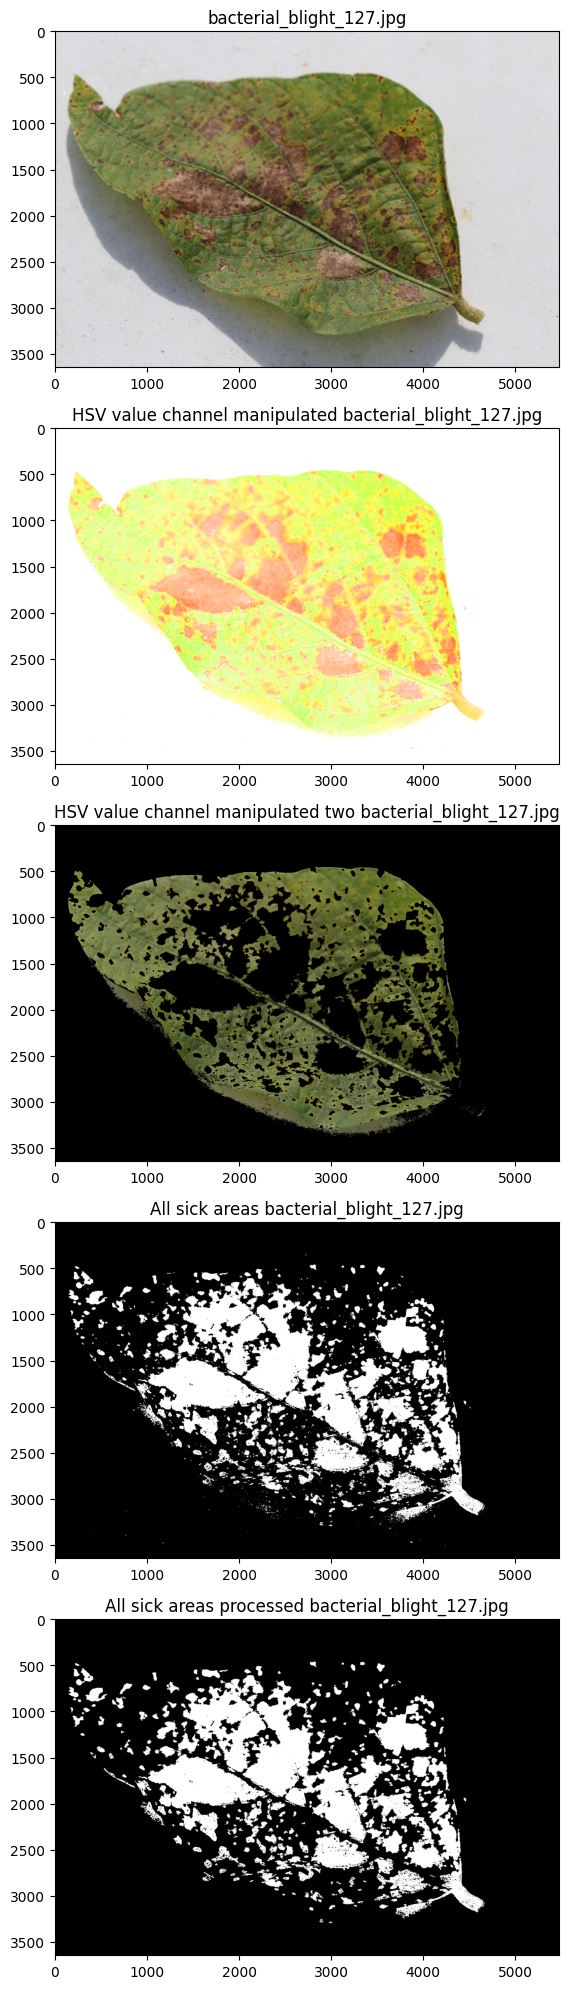

In [3]:
good_bkgd1_bac_blight_dir_str2 = "./imgs_with_good_background/bacterial_blight/bkgd2/"
test_bac_blight_str2 = "bacterial_blight_127.jpg"

test_bac_blight_img2 = io.imread(good_bkgd1_bac_blight_dir_str2 + test_bac_blight_str2)
test_bac_blight_img_hsv2 = rgb2hsv(test_bac_blight_img2)
test_bac_blight_img_s_only2 = test_bac_blight_img_hsv2[:, :, 1].copy()
test_bac_blight_img_h_only2 = test_bac_blight_img_hsv2[:, :, 0].copy()
test_bac_blight_img_v_only2 = test_bac_blight_img_hsv2[:, :, 2].copy()
test_bac_blight_img_hsv2_cp1 = test_bac_blight_img_hsv2.copy()
test_bac_blight_img_hsv2[:, :, 2] = HSV_V_CHANNEL_INIT_MASK_VAL
healthy_h_mask3 = (HEALTHY_HUE_LOWER <= test_bac_blight_img_h_only2) & (test_bac_blight_img_h_only2 <= HEALTHY_HUE_UPPER)
background_s_mask3 = test_bac_blight_img_s_only2 <= MAX_S_CHANNEL_VAL_BKGD
test_bac_blight_img_s_only2[background_s_mask3] = HSV_S_CHANNEL_MASK_VAL
test_bac_blight_img_v_only2[~healthy_h_mask3 | background_s_mask3] = HSV_V_CHANNEL_NON_HEALTHY_MASK_VAL
sick_mask3 = ~healthy_h_mask3 & ~background_s_mask3
procd_sick_mask3 = remove_small_objects(sick_mask3, min_size=NOISE_PATCH_MAX_SIZE, connectivity=2)
std_hue_test_bac_blight2 = test_bac_blight_img_h_only2[~background_s_mask3].std(ddof=1)
test_bac_blight_img_hsv2[:, :, 1] = test_bac_blight_img_s_only2
test_bac_blight_img_hsv2_cp1[:, :, 2] = test_bac_blight_img_v_only2
test_bac_blight_img_hsv_val_zeroed_rgb2 = hsv2rgb(test_bac_blight_img_hsv2)
test_bac_blight_img_hsv_val_procd_rgb2 = hsv2rgb(test_bac_blight_img_hsv2_cp1)
healthy_h_mask_no_bkgd3 = healthy_h_mask3 & ~background_s_mask3
sick_area_frac3 = float(procd_sick_mask3.astype(np.int64).sum()) / \
                    (float(procd_sick_mask3.astype(np.int64).sum()) + float(healthy_h_mask_no_bkgd3.astype(np.int64).sum()))

print(f"Sick area fraction: {sick_area_frac3}; STD-DEV masked hue: {std_hue_test_bac_blight2}\n")
fig3, ax3 = plt.subplots(nrows=5, ncols=1, figsize=(6, 5*4))
ax3[0].imshow(test_bac_blight_img2)
ax3[0].axis("image")
ax3[0].set_title(test_bac_blight_str2)
ax3[1].imshow(test_bac_blight_img_hsv_val_zeroed_rgb2)
ax3[1].axis("image")
ax3[1].set_title("HSV value channel manipulated " + test_bac_blight_str2)
ax3[2].imshow(test_bac_blight_img_hsv_val_procd_rgb2)
ax3[2].axis("image")
ax3[2].set_title("HSV value channel manipulated two " + test_bac_blight_str2)
ax3[3].imshow(sick_mask3.astype(np.uint8) * 255, cmap="gray")
ax3[3].axis("image")
ax3[3].set_title("All sick areas " + test_bac_blight_str2)
ax3[4].imshow(procd_sick_mask3.astype(np.uint8) * 255, cmap="gray")
ax3[4].axis("image")
ax3[4].set_title("All sick areas processed " + test_bac_blight_str2)
fig3.tight_layout()
plt.show();

Sick area fraction: 0.0019048446618670097; STD-DEV masked hue: 0.014411048386824775



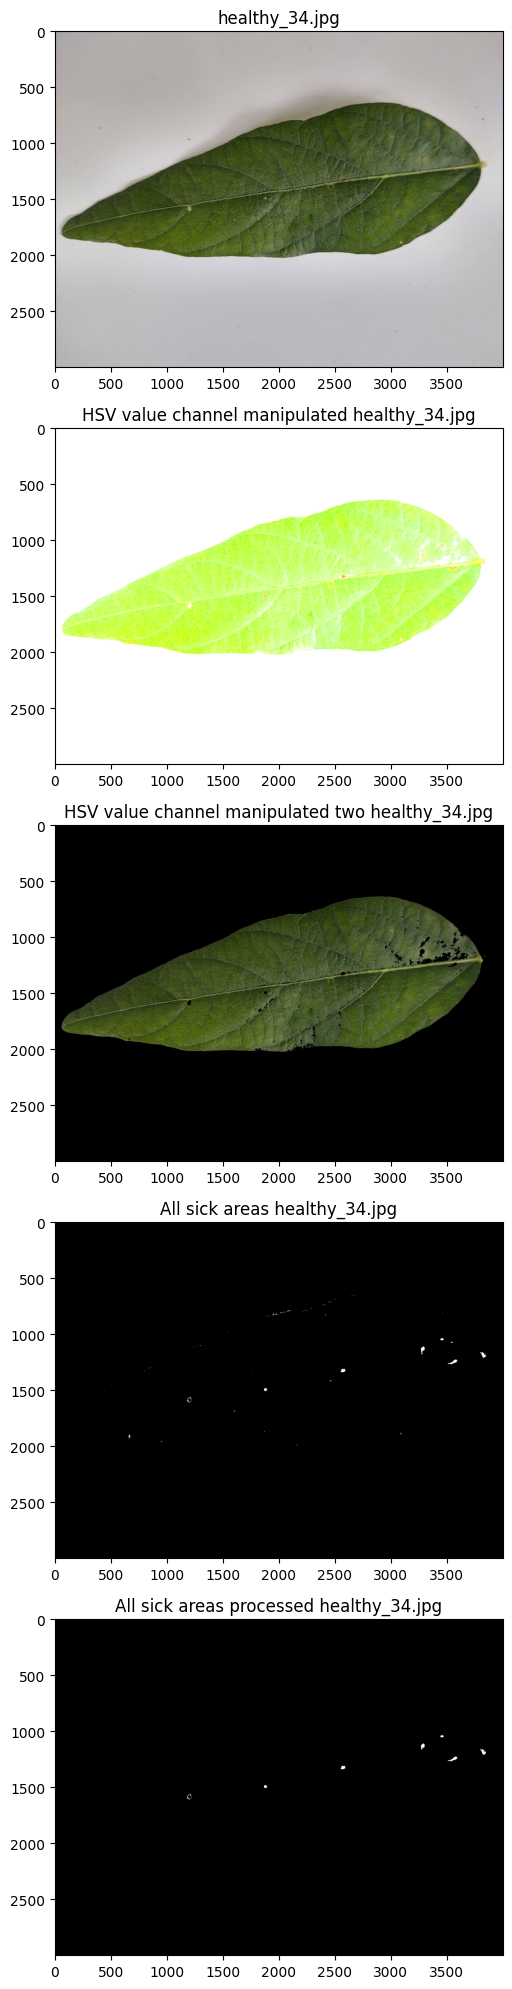

In [4]:
good_bkgd1_healthy_dir_str = "./imgs_with_good_background/healthy/"
test_healthy_str = "healthy_34.jpg"

test_healthy_img = io.imread(good_bkgd1_healthy_dir_str + test_healthy_str)
test_healthy_img_hsv = rgb2hsv(test_healthy_img)
test_healthy_img_s_only = test_healthy_img_hsv[:, :, 1].copy()
test_healthy_img_h_only = test_healthy_img_hsv[:, :, 0].copy()
test_healthy_img_v_only = test_healthy_img_hsv[:, :, 2].copy()
test_healthy_img_hsv_cp1 = test_healthy_img_hsv.copy()
test_healthy_img_hsv[:, :, 2] = HSV_V_CHANNEL_INIT_MASK_VAL
healthy_h_mask4 = (HEALTHY_HUE_LOWER <= test_healthy_img_h_only) & (test_healthy_img_h_only <= HEALTHY_HUE_UPPER)
background_s_mask4 = test_healthy_img_s_only <= MAX_S_CHANNEL_VAL_BKGD
test_healthy_img_s_only[background_s_mask4] = HSV_S_CHANNEL_MASK_VAL
test_healthy_img_v_only[~healthy_h_mask4 | background_s_mask4] = HSV_V_CHANNEL_NON_HEALTHY_MASK_VAL
sick_mask4 = ~healthy_h_mask4 & ~background_s_mask4
procd_sick_mask4 = remove_small_objects(sick_mask4, min_size=NOISE_PATCH_MAX_SIZE, connectivity=2)
std_hue_test_healthy = test_healthy_img_h_only[~background_s_mask4].std(ddof=1)
test_healthy_img_hsv[:, :, 1] = test_healthy_img_s_only
test_healthy_img_hsv_cp1[:, :, 2] = test_healthy_img_v_only
test_healthy_img_hsv_val_zeroed_rgb = hsv2rgb(test_healthy_img_hsv)
test_healthy_img_hsv_val_procd_rgb2 = hsv2rgb(test_healthy_img_hsv_cp1)
healthy_h_mask_no_bkgd4 = healthy_h_mask4 & ~background_s_mask4
sick_area_frac4 = float(procd_sick_mask4.astype(np.int64).sum()) / \
                    (float(procd_sick_mask4.astype(np.int64).sum()) + float(healthy_h_mask_no_bkgd4.astype(np.int64).sum()))

print(f"Sick area fraction: {sick_area_frac4}; STD-DEV masked hue: {std_hue_test_healthy}\n")
fig4, ax4 = plt.subplots(nrows=5, ncols=1, figsize=(6, 5*4))
ax4[0].imshow(test_healthy_img)
ax4[0].axis("image")
ax4[0].set_title(test_healthy_str)
ax4[1].imshow(test_healthy_img_hsv_val_zeroed_rgb)
ax4[1].axis("image")
ax4[1].set_title("HSV value channel manipulated " + test_healthy_str)
ax4[2].imshow(test_healthy_img_hsv_val_procd_rgb2)
ax4[2].axis("image")
ax4[2].set_title("HSV value channel manipulated two " + test_healthy_str)
ax4[3].imshow(sick_mask4.astype(np.uint8) * 255, cmap="gray")
ax4[3].axis("image")
ax4[3].set_title("All sick areas " + test_healthy_str)
ax4[4].imshow(procd_sick_mask4.astype(np.uint8) * 255, cmap="gray")
ax4[4].axis("image")
ax4[4].set_title("All sick areas processed " + test_healthy_str)
fig4.tight_layout()
plt.show();

Sick area fraction: 0.8241971795957659; STD-DEV masked hue: 0.01518159171954794



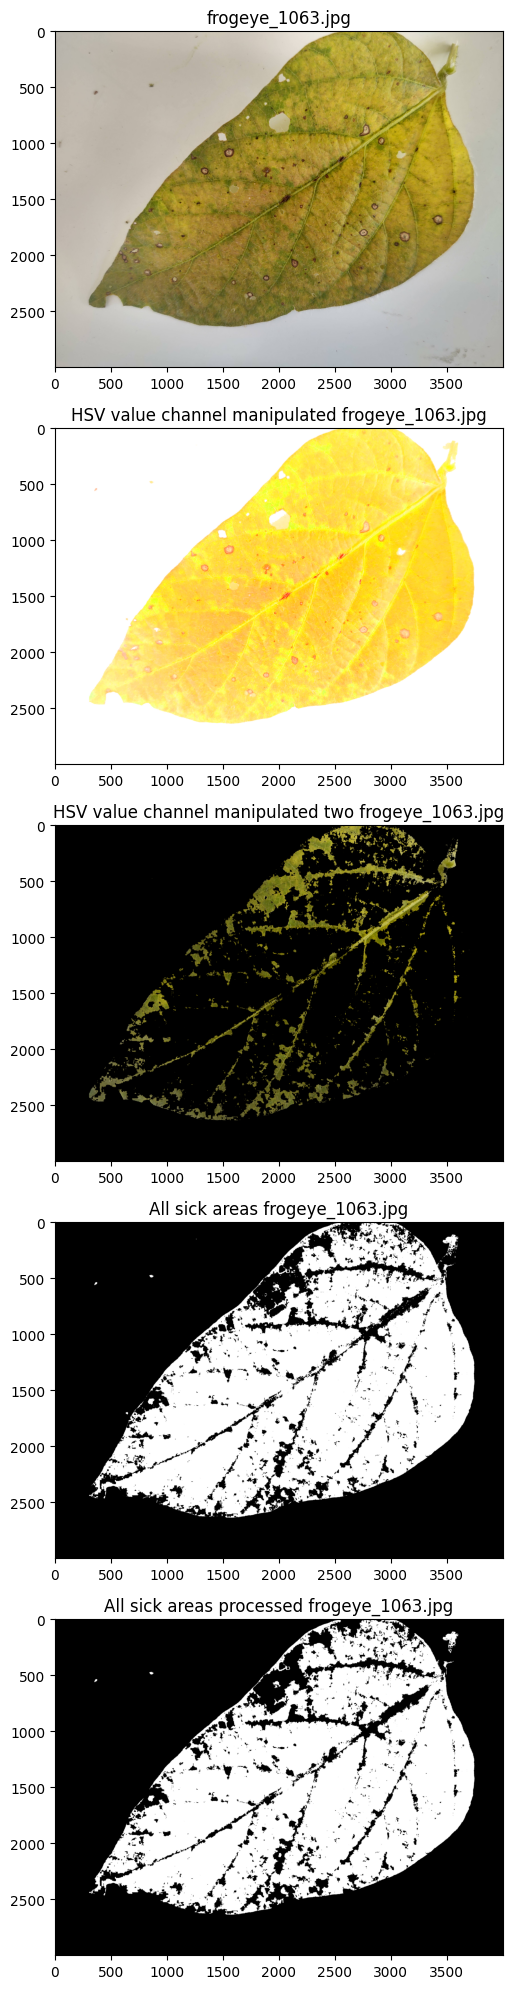

In [5]:
good_bkgd1_frogeye_dir_str = "./imgs_with_good_background/frogeye/"
test_frogeye_str = "frogeye_1063.jpg"

test_frogeye_img = io.imread(good_bkgd1_frogeye_dir_str + test_frogeye_str)
test_frogeye_img_hsv = rgb2hsv(test_frogeye_img)
test_frogeye_img_s_only = test_frogeye_img_hsv[:, :, 1].copy()
test_frogeye_img_h_only = test_frogeye_img_hsv[:, :, 0].copy()
test_frogeye_img_v_only = test_frogeye_img_hsv[:, :, 2].copy()
test_frogeye_img_hsv_cp1 = test_frogeye_img_hsv.copy()
test_frogeye_img_hsv[:, :, 2] = HSV_V_CHANNEL_INIT_MASK_VAL
healthy_h_mask5 = (HEALTHY_HUE_LOWER <= test_frogeye_img_h_only) & (test_frogeye_img_h_only <= HEALTHY_HUE_UPPER)
background_s_mask5 = test_frogeye_img_s_only <= MAX_S_CHANNEL_VAL_BKGD
test_frogeye_img_s_only[background_s_mask5] = HSV_S_CHANNEL_MASK_VAL
test_frogeye_img_v_only[~healthy_h_mask5 | background_s_mask5] = HSV_V_CHANNEL_NON_HEALTHY_MASK_VAL
sick_mask5 = ~healthy_h_mask5 & ~background_s_mask5
procd_sick_mask5 = remove_small_objects(sick_mask5, min_size=NOISE_PATCH_MAX_SIZE, connectivity=2)
std_hue_test_frogeye = test_frogeye_img_h_only[~background_s_mask5].std(ddof=1)
test_frogeye_img_hsv[:, :, 1] = test_frogeye_img_s_only
test_frogeye_img_hsv_cp1[:, :, 2] = test_frogeye_img_v_only
test_frogeye_img_hsv_val_zeroed_rgb = hsv2rgb(test_frogeye_img_hsv)
test_frogeye_img_hsv_val_procd_rgb2 = hsv2rgb(test_frogeye_img_hsv_cp1)
healthy_h_mask_no_bkgd5 = healthy_h_mask5 & ~background_s_mask5
sick_area_frac5 = float(procd_sick_mask5.astype(np.int64).sum()) / \
                    (float(procd_sick_mask5.astype(np.int64).sum()) + float(healthy_h_mask_no_bkgd5.astype(np.int64).sum()))

print(f"Sick area fraction: {sick_area_frac5}; STD-DEV masked hue: {std_hue_test_frogeye}\n")
fig5, ax5 = plt.subplots(nrows=5, ncols=1, figsize=(6, 5*4))
ax5[0].imshow(test_frogeye_img)
ax5[0].axis("image")
ax5[0].set_title(test_frogeye_str)
ax5[1].imshow(test_frogeye_img_hsv_val_zeroed_rgb)
ax5[1].axis("image")
ax5[1].set_title("HSV value channel manipulated " + test_frogeye_str)
ax5[2].imshow(test_frogeye_img_hsv_val_procd_rgb2)
ax5[2].axis("image")
ax5[2].set_title("HSV value channel manipulated two " + test_frogeye_str)
ax5[3].imshow(sick_mask5.astype(np.uint8) * 255, cmap="gray")
ax5[3].axis("image")
ax5[3].set_title("All sick areas " + test_frogeye_str)
ax5[4].imshow(procd_sick_mask5.astype(np.uint8) * 255, cmap="gray")
ax5[4].axis("image")
ax5[4].set_title("All sick areas processed " + test_frogeye_str)
fig5.tight_layout()
plt.show();

Sick area fraction: 0.06341991358342719; STD-DEV masked hue: 0.10998510474827089



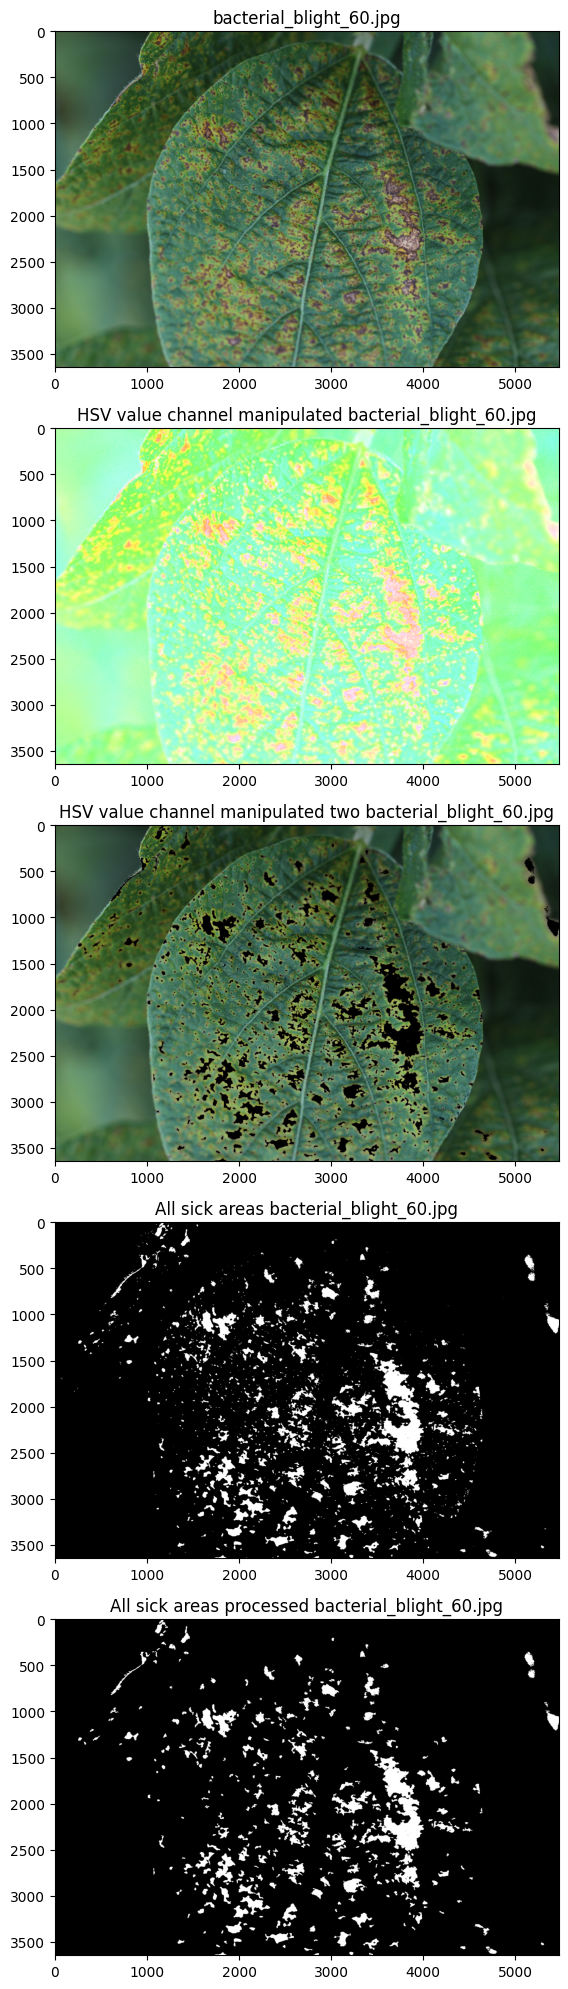

In [6]:
good_bkgd1_bac_blight_dir_str3 = "./imgs_with_good_background/bacterial_blight/bkgd_none/"
test_bac_blight_str3 = "bacterial_blight_60.jpg"

test_bac_blight_img3 = io.imread(good_bkgd1_bac_blight_dir_str3 + test_bac_blight_str3)
test_bac_blight_img_hsv3 = rgb2hsv(test_bac_blight_img3)
test_bac_blight_img_h_only3 = test_bac_blight_img_hsv3[:, :, 0].copy()
test_bac_blight_img_v_only3 = test_bac_blight_img_hsv3[:, :, 2].copy()
test_bac_blight_img_hsv3_cp1 = test_bac_blight_img_hsv3.copy()
test_bac_blight_img_hsv3[:, :, 2] = HSV_V_CHANNEL_INIT_MASK_VAL
healthy_h_mask6 = (HEALTHY_HUE_LOWER <= test_bac_blight_img_h_only3) & (test_bac_blight_img_h_only3 <= HEALTHY_HUE_UPPER)
test_bac_blight_img_v_only3[~healthy_h_mask6] = HSV_V_CHANNEL_NON_HEALTHY_MASK_VAL
sick_mask6 = ~healthy_h_mask6
procd_sick_mask6 = remove_small_objects(sick_mask6, min_size=NOISE_PATCH_MAX_SIZE, connectivity=2)
std_hue_test_bac_blight3 = test_bac_blight_img_h_only3.std(ddof=1)
test_bac_blight_img_hsv3_cp1[:, :, 2] = test_bac_blight_img_v_only3
test_bac_blight_img_hsv_val_zeroed_rgb3 = hsv2rgb(test_bac_blight_img_hsv3)
test_bac_blight_img_hsv_val_procd_rgb3 = hsv2rgb(test_bac_blight_img_hsv3_cp1)
sick_area_frac6 = float(procd_sick_mask6.astype(np.int64).sum()) / \
                    (float(procd_sick_mask6.astype(np.int64).sum()) + float(healthy_h_mask6.astype(np.int64).sum()))

print(f"Sick area fraction: {sick_area_frac6}; STD-DEV masked hue: {std_hue_test_bac_blight3}\n")
fig3, ax3 = plt.subplots(nrows=5, ncols=1, figsize=(6, 5*4))
ax3[0].imshow(test_bac_blight_img3)
ax3[0].axis("image")
ax3[0].set_title(test_bac_blight_str3)
ax3[1].imshow(test_bac_blight_img_hsv_val_zeroed_rgb3)
ax3[1].axis("image")
ax3[1].set_title("HSV value channel manipulated " + test_bac_blight_str3)
ax3[2].imshow(test_bac_blight_img_hsv_val_procd_rgb3)
ax3[2].axis("image")
ax3[2].set_title("HSV value channel manipulated two " + test_bac_blight_str3)
ax3[3].imshow(sick_mask6.astype(np.uint8) * 255, cmap="gray")
ax3[3].axis("image")
ax3[3].set_title("All sick areas " + test_bac_blight_str3)
ax3[4].imshow(procd_sick_mask6.astype(np.uint8) * 255, cmap="gray")
ax3[4].axis("image")
ax3[4].set_title("All sick areas processed " + test_bac_blight_str3)
fig3.tight_layout()
plt.show();

In [7]:
import os
from skimage.measure import label, regionprops_table
import pandas as pd

LIST_OF_DIRECTORIES = ["./imgs_with_good_background/healthy/",
                       "./imgs_with_good_background/soybean_rust/",
                       "./imgs_with_good_background/frogeye/",
                       "./imgs_with_good_background/bacterial_blight/bkgd1/",
                       "./imgs_with_good_background/bacterial_blight/bkgd2/",
                       "./imgs_with_good_background/bacterial_blight/bkgd_none/"]
NO_BKGD_KEY_STR = "bkgd_none"
BKGD1_KEY_STR = "bkgd1"
FEATURES_LIST = ["filename", "std_H", "lesion_count", "mean_lesion_img_frac",
                    "mean_lesion_eccentricity", "infected_area_frac", "class"]
REGION_PROPS_KEY_LIST = ["area", "eccentricity"]
OUTPUT_CSV_FILE = "ted_features_soybean_total.csv"

def get_features_list(filepath_str):
    raw_rgb_img = io.imread(filepath_str)
    init_hsv_img = rgb2hsv(raw_rgb_img)
    img_h_channel = init_hsv_img[:, :, 0].copy()
    img_s_channel = init_hsv_img[:, :, 1].copy()
    background_mask = None
    healthy_h_mask = (HEALTHY_HUE_LOWER <= img_h_channel) & \
                             (img_h_channel <= HEALTHY_HUE_UPPER)
    if BKGD1_KEY_STR in filepath_str:
        background_mask = img_s_channel <= MAX_S_CHANNEL_VAL_BKGD1
    elif not (NO_BKGD_KEY_STR in filepath_str):
        background_mask = img_s_channel <= MAX_S_CHANNEL_VAL_BKGD
    img_std_h = 0.0
    raw_sick_mask = np.array([False])
    healthy_mask_no_bkgd = np.array([False])
    if not (background_mask is None):
        img_std_h = img_h_channel[~background_mask].std(ddof=1)
        raw_sick_mask = ~healthy_h_mask & ~background_mask
        healthy_mask_no_bkgd = healthy_h_mask & ~background_mask
    else:
        img_std_h = img_h_channel.std(ddof=1)
        raw_sick_mask = ~healthy_h_mask
        healthy_mask_no_bkgd = healthy_h_mask
    procd_sick_mask = remove_small_objects(raw_sick_mask,
                                             min_size=NOISE_PATCH_MAX_SIZE,
                                                              connectivity=2)
    sick_area_frac = float(procd_sick_mask.astype(np.int64).sum()) / \
                         (float(procd_sick_mask.astype(np.int64).sum()) + \
                            float(healthy_mask_no_bkgd.astype(np.int64).sum()))
    list_of_filepath_comps = filepath_str.split("/")
    class_str = list_of_filepath_comps[2]
    filename_str = list_of_filepath_comps[-1]
    labeled_sick_areas = label(procd_sick_mask)
    region_props_dict = regionprops_table(labeled_sick_areas,
                                            procd_sick_mask,
                                            properties=REGION_PROPS_KEY_LIST)
    num_lesions = np.size(np.array(region_props_dict[REGION_PROPS_KEY_LIST[0]]))
    mean_lesion_eccent = \
            np.array(region_props_dict[REGION_PROPS_KEY_LIST[1]]).mean() \
                                                       if num_lesions > 0 else 0.0
    mean_lesion_img_fraction = \
            float(np.array(region_props_dict[REGION_PROPS_KEY_LIST[0]]).mean()) / \
                                                       float(np.size(procd_sick_mask)) \
                                                                if num_lesions > 0 else 0.0
    features = [filename_str, float(img_std_h), int(num_lesions),
                     mean_lesion_img_fraction, float(mean_lesion_eccent),
                                                  sick_area_frac, class_str]
    return features

all_features = []
processed_count = 0
for dirpath_str in LIST_OF_DIRECTORIES:
    for file_entry in os.scandir(dirpath_str):
        all_features.append(get_features_list(str(file_entry.path)))
        processed_count += 1
        if processed_count % 25 == 0:
            print(f"Now processed {processed_count} images...")

# Save to CSV
all_features_df = pd.DataFrame(all_features, columns=FEATURES_LIST)
all_features_df.to_csv(OUTPUT_CSV_FILE, index=False)
print(f"\nSaved all soybean images features to: {OUTPUT_CSV_FILE}")

Now processed 25 images...
Now processed 50 images...
Now processed 75 images...
Now processed 100 images...
Now processed 125 images...
Now processed 150 images...
Now processed 175 images...
Now processed 200 images...
Now processed 225 images...
Now processed 250 images...
Now processed 275 images...
Now processed 300 images...
Now processed 325 images...
Now processed 350 images...
Now processed 375 images...
Now processed 400 images...

Saved all soybean images features to: ted_features_soybean_total.csv
